# Customer Segmentation Using Kmeans clustering 

## Step 1: Import Dependencies

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Step 2: Import Data

In [2]:
# Importing the dataset
df = pd.read_csv('DATA/Mall_Customers.csv',
                 index_col=0,
                 header=0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## Step 3: EDA 

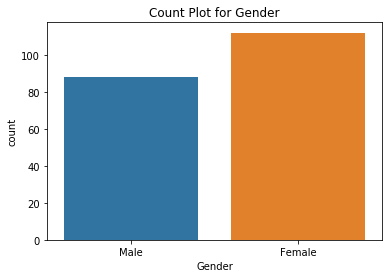

In [3]:
# count plot on single categorical variable
sns.countplot(x ='Gender', data = df)

plt.title("Count Plot for Gender")
plt.show()

Observation: The countplot illustrates the distribution of mall customer data by gender, revealing that there are 112 female customers and 88 male customers. This observation indicates that the female customer count is higher than the male count, suggesting a relatively larger presence of female customers in the dataset.

In [4]:
df["Gender"].value_counts()       # use to count categorical values

Female    112
Male       88
Name: Gender, dtype: int64

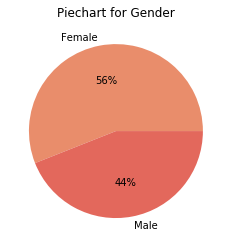

In [5]:
# declaring data
data = [112, 88]
keys = ['Female', 'Male']
  
# declaring exploding pie
explode = [0, 0]

# define Seaborn color palette to use
palette_color = sns.color_palette('flare')
  
# plotting data on chart
plt.pie(data, labels=keys,
        colors=palette_color,
        explode=explode,
        autopct='%.0f%%')
plt.title("Piechart for Gender")
  
# displaying chart
plt.show()

Observation: The pie chart represents the distribution of mall customer data based on gender. It indicates that females constitute 56% of the customer demographic, while males make up 44%. This suggests a higher representation of female customers compared to males in the observed dataset.

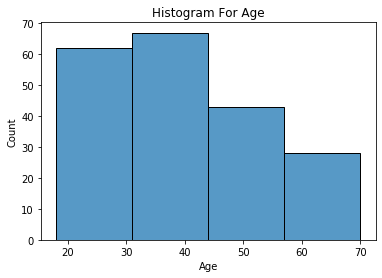

In [6]:
# Plot histogram
sns.histplot(data = df, 
             x="Age",
             bins=4,
             kde = False)          # kernel density estimatoin
plt.title("Histogram For Age")
plt.show()

Observation: The histogram visually represents the distribution of ages among the dataset. The x-axis represents the age range, divided into four bins, and the y-axis shows the frequency of individuals within each age range.
The histogram provides insights into the age distribution within the dataset, highlighting any concentration or gaps in specific age groups.
+ The age distribution analysis reveals that the frequency of individuals in the age group of 20 to 45 is higher, while it decreases noticeably beyond the age of 45.


In [7]:
sns.__version__

'0.11.2'

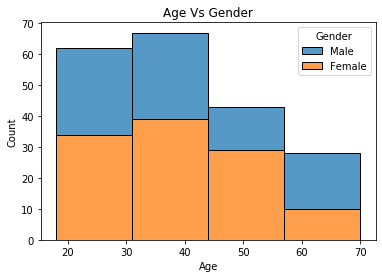

In [8]:
sns.histplot(data = df, 
             x="Age",
             bins=4,
             hue="Gender",
             multiple="stack",
             kde = False)
plt.title("Age Vs Gender")
plt.show()

it is biveriat analysis           11.ML 57:40

Observation - The stacked histogram provides a visual representation of age distribution across genders in a dataset, using four age bins on the x-axis and frequency on the y-axis. Key observations include:

Age Distribution Across Genders: Stacked bars illustrate the distribution of ages for both genders, with segments representing different age ranges.

Dominant Age Ranges: The height of bars indicates prevalent age ranges within each gender, aiding in identifying specific age groups more common in one gender.

Comparison Between Genders: A comparison of bar heights enables the observation of disparities or similarities in age distribution between genders, highlighting pronounced age groups in each.

In essence, the stacked histogram facilitates a quick and clear understanding of age patterns across genders in the dataset.

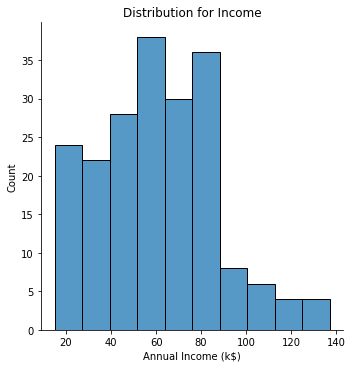

In [9]:
# distribuation plot
sns.displot(df, x="Annual Income (k$)")       
plt.title("Distribution for Income")
plt.show()

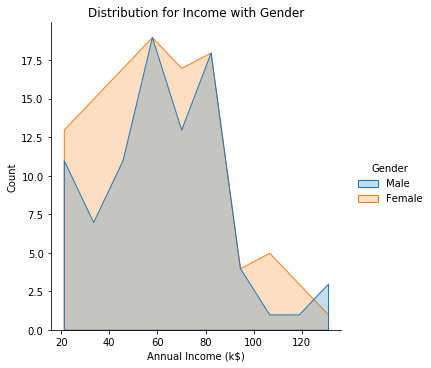

In [10]:
sns.displot(df, x="Annual Income (k$)", hue="Gender",element="poly")
plt.title("Distribution for Income with Gender")
plt.show()

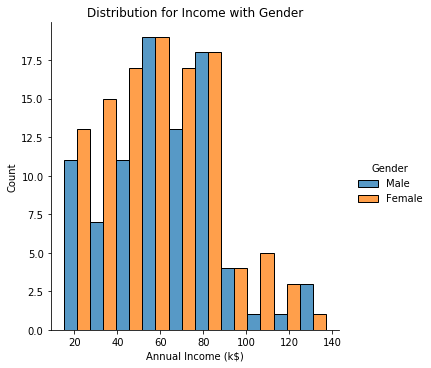

In [11]:
sns.displot(df, x="Annual Income (k$)", hue="Gender", multiple="dodge")
plt.title("Distribution for Income with Gender")
plt.show()

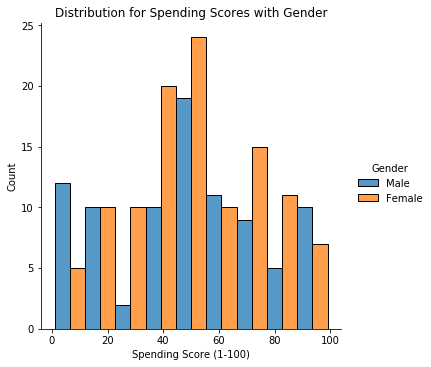

In [12]:
sns.displot(df, x="Spending Score (1-100)", hue="Gender", multiple="dodge")
plt.title("Distribution for Spending Scores with Gender")
plt.show()

spending score is between 0-100

The spending score between 40 to 50 is higher among females compared to males
Females generally have a majority of the spending score, particularly around 50 to 60. In contrast, males exhibit a higher spending score within the 0 to 20 range, while females tend to have lower scores in that interval.
So the targeted customer would be females

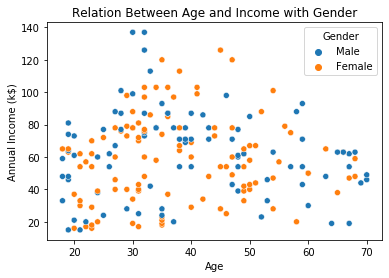

In [13]:
# scatter pot
sns.scatterplot(data=df, x="Age", y="Annual Income (k$)", hue="Gender")
plt.title("Relation Between Age and Income with Gender")
plt.show()

Observation - There seems to be no significant correlation between age and spending score. As a result, targeting customers with higher annual income within the age range of 20 to 60 could be a viable strategy.

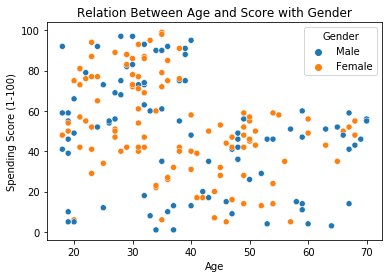

In [14]:
sns.scatterplot(data=df, x="Age", y="Spending Score (1-100)", hue="Gender")
plt.title("Relation Between Age and Score with Gender")
plt.show()

Observation - Customers between the ages of 20 to 40 tend to have higher spending scores. However, for individuals aged 40 to 60, the spending score does not exceed 60, and there is a decline in spending scores beyond the age of 40.

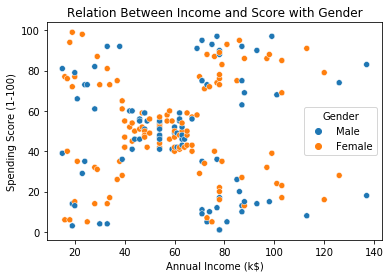

In [15]:
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender")
plt.title("Relation Between Income and Score with Gender")
plt.show()

Topright customer has higher annual income and spending score so they are loyal or targeted customer.
in center cluster has medium spending score and income, sensible pepoel and at the leftbottem both has lower, they are random customer which are not focusable. 
at the topleft customer has high spending score but low income as bussiness percpective they are good customer because they spend more
and at the rightbottem cluster has low spending score but high income, we can give them offer to spend.

Observation

Customers in the top-right cluster exhibit both higher annual income and spending scores, making them loyal or targeted customers. In the center cluster, individuals show a moderate spending score and income, indicating sensible behavior. In the bottom-left, there are customers with lower spending scores and income, likely representing random customers who may not be a focal point for targeting.

Customers in the top-left cluster demonstrate a high spending score despite having a low income. From a business perspective, they can be considered valuable as they tend to spend more. On the other hand, in the bottom-right cluster, customers have low spending scores but high income. It might be beneficial to offer them incentives to encourage higher spending.

## Step 4: Data Preprocessing

In [16]:
print(df.shape) 
print(df.info())
print(df.isnull().sum())

(200, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 17.8+ KB
None
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [17]:
df.describe(include="all")                             # it describes statistical analysis

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


In [18]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

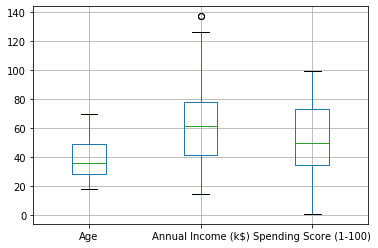

In [19]:
df.boxplot()
plt.show()

There is outlier in annual income column

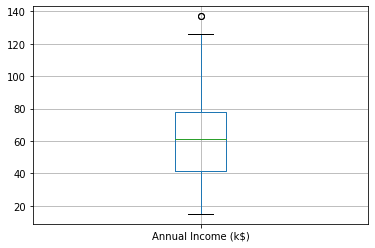

In [20]:
df.boxplot("Annual Income (k$)")
plt.show()

In [21]:
X = df.iloc[: , 2:4] # [   start_row  : stop_row , start_col: stop_col   ]

In [22]:
from sklearn import cluster as c

In [23]:
dir(c)

['AffinityPropagation',
 'AgglomerativeClustering',
 'Birch',
 'DBSCAN',
 'FeatureAgglomeration',
 'KMeans',
 'MeanShift',
 'MiniBatchKMeans',
 'OPTICS',
 'SpectralBiclustering',
 'SpectralClustering',
 'SpectralCoclustering',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_affinity_propagation',
 '_agglomerative',
 '_bicluster',
 '_birch',
 '_dbscan',
 '_dbscan_inner',
 '_feature_agglomeration',
 '_hierarchical_fast',
 '_k_means_elkan',
 '_k_means_fast',
 '_k_means_lloyd',
 '_kmeans',
 '_mean_shift',
 '_optics',
 '_spectral',
 'affinity_propagation',
 'cluster_optics_dbscan',
 'cluster_optics_xi',
 'compute_optics_graph',
 'dbscan',
 'estimate_bandwidth',
 'get_bin_seeds',
 'k_means',
 'linkage_tree',
 'mean_shift',
 'spectral_clustering',
 'ward_tree']

In [24]:
%%time 

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
from tqdm import tqdm_notebook as tqdm

K_MAX = 15
wsse = []
# progress bar 
with tqdm(total=K_MAX-1) as pbar:
    for i in range(1, K_MAX):

        kmeans = KMeans(n_clusters = i, random_state = 10)
        kmeans.fit(X)
        wsse.append(kmeans.inertia_)
        pbar.update(1)

  0%|          | 0/14 [00:00<?, ?it/s]

Wall time: 2.29 s


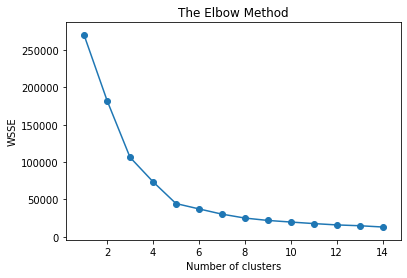

In [25]:
plt.plot(range(1, K_MAX), wsse)
plt.scatter(range(1, K_MAX),wsse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()

In [26]:
print(wsse[4])

44448.45544793369


In [27]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5,  random_state = 10)
kmeans.fit(X)
Y_pred = kmeans.predict(X)

In [28]:
Y_pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [29]:
kmeans.n_iter_

3

In [30]:
df["Clusters"]=Y_pred
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,2
2,Male,21,15,81,3
3,Female,20,16,6,2
4,Female,23,16,77,3
5,Female,31,17,40,2
6,Female,22,17,76,3
7,Female,35,18,6,2
8,Female,23,18,94,3
9,Male,64,19,3,2


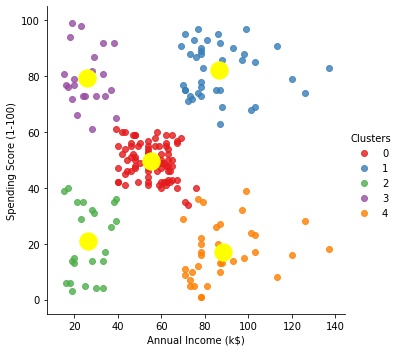

In [31]:
sns.lmplot(data=df, 
           x='Annual Income (k$)',
           y='Spending Score (1-100)',
           fit_reg=False, # No regression line
           hue='Clusters',
           palette="Set1")  

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s = 300, c = 'yellow')
plt.show()

In [32]:
df["Clusters"]=df.Clusters.map({0:"Careless",1:"Sensible",2:"Target",
                              3:"NotUseful",4:"Careful"})

In [33]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,Target
2,Male,21,15,81,NotUseful
3,Female,20,16,6,Target
4,Female,23,16,77,NotUseful
5,Female,31,17,40,Target


In [34]:
df.to_csv(r"TargetCustomers.csv",index=True)

In [36]:
new_df=df[df["Clusters"]=="Target"]

In [37]:
new_df.shape

(23, 5)

In [38]:
new_df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,Target
3,Female,20,16,6,Target
5,Female,31,17,40,Target
7,Female,35,18,6,Target
9,Male,64,19,3,Target
11,Male,67,19,14,Target
13,Female,58,20,15,Target
15,Male,37,20,13,Target
17,Female,35,21,35,Target


In [39]:
new_df.to_excel(r"Target_Customers.xlsx",index=True)

In [35]:
questions 
+ how do we know which plot we want 

SyntaxError: invalid syntax (<ipython-input-35-7bf35797b48f>, line 2)

LINE 2D
HYPER PLANE  3D